In [2]:
from djccx.inp.inp import inp
from djccx.frd.readfrd import readfrd

In [3]:
inp_f = inp("output/main.inp")

In [4]:
frd = readfrd("output/main.frd")

In [8]:
nodes_results = inp_f.setResults(frd)

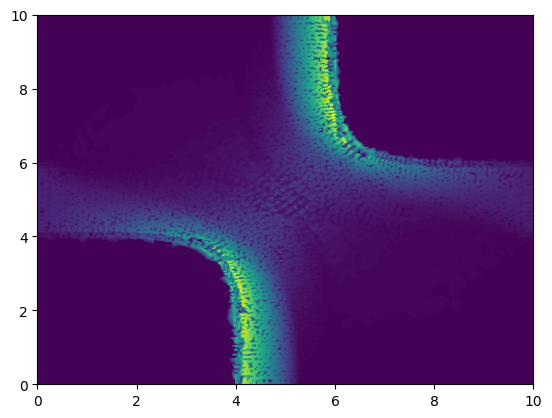

In [10]:
from matplotlib import pyplot as plt

x =nodes_results["x"]
y = nodes_results["y"]
z = nodes_results["z"]

S = nodes_results["P1"]

plt.tricontourf(x, y, S, 100)